In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
os.chdir('/Users/cody/Documents/GitHub/DSCI235-Project/235_Project')

In [4]:
non_goal = pd.read_csv('Non_goalie_data.csv')

In [5]:
non_goal.head()

,Player,Age,Tm,GP,CF,CA,CF%,CF% rel,FF,FA,...,TOI(EV),TK,GV,E+/-,SAtt.,Thru%,F,D,C,W
0,Justin Abdelkader,31.0,DET,71,782,918,46.0,-2.8,571,716,...,12:54,9,40,-11.0,159.0,59.7,0,0,0,1
1,Pontus Åberg,25.0,TOT,59,722,681,51.5,3.3,521,525,...,12:31,15,36,-0.3,NaN,NaN,0,0,0,1
2,Pontus Åberg,25.0,ANA,37,511,449,53.2,7.4,360,351,...,13:32,13,31,-0.4,153.0,48.4,0,0,0,1
3,Pontus Åberg,25.0,MIN,22,211,232,47.6,-4.1,161,174,...,10:48,2,5,0.1,58.0,46.6,0,0,0,1
4,Vitaly Abramov,20.0,OTT,1,9,13,40.9,-1.8,4,9,...,13:01,4,2,-0.8,5.0,0.0,0,0,0,1


## Removed Forwards -- Forwards are a general term for each of Centers(C) and Left/Right Wingers(W)

In [34]:
non_goal = non_goal[['Age', 'CF%', 'D', 'C', 'W']]

In [35]:
non_goal.head()

,Age,CF%,D,C,W
0,31.0,46.0,0,0,1
1,25.0,51.5,0,0,1
2,25.0,53.2,0,0,1
3,25.0,47.6,0,0,1
4,20.0,40.9,0,0,1


In [43]:
defender = non_goal[(non_goal['D'] == 1)]
defender = defender.dropna()
defender.head()

,Age,CF%,D,C,W
11,27.0,53.1,1,0,0
12,30.0,51.8,1,0,0
18,22.0,51.4,1,0,0
40,28.0,40.6,1,0,0
42,27.0,53.0,1,0,0


In [44]:
x_d = defender['Age'].values
y_d = defender['CF%'].values
index = np.argsort(x_d)
x_d = x_d[index]
y_d = y_d[index]

In [46]:
lowess = sm.nonparametric.lowess
loess_result = lowess(y_d, x_d, frac=0.3, return_sorted=True)
xd_fit = loess_result[:, 0]
yd_fit = loess_result[:, 1]

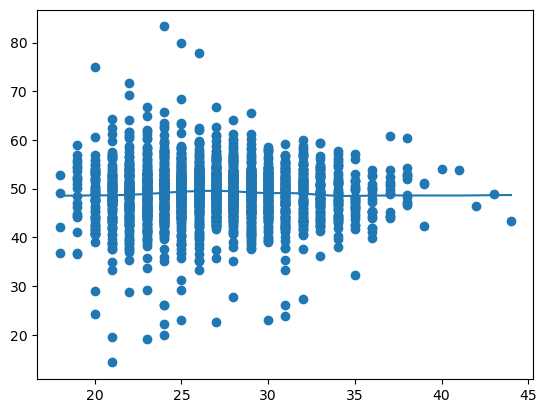

In [48]:
plt.scatter(x_d,y_d)
plt.plot(xd_fit,yd_fit);